In [1]:
import os
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_data = tc.image_analysis.load_images("dataset/train/", with_path=True)
len(train_data)

4838

In [3]:
train_data["label"] = train_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))
train_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  4838 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   20  |    No    |
+------------------+-------+----------+

Most frequent items:
+-----------+-------+
|   value   | count |
+-----------+-------+
| pineapple |  260  |
|   apple   |  250  |
|   banana  |  250  |
|  doughnut |  250  |
|   grape   |  250  |
|  hot dog  |  250  |
| ice cream |  250  |
|   juice   |  250  |
|   muffin  |  250  |
|   salad   |  250  |
+-----------+-------+


In [4]:
model = tc.image_classifier.create(train_data, target="label", model="squeezenet_v1.1", verbose=True, max_iterations=160)

Downloading base mlmodel

Downloading https://docs-assets.developer.apple.com/coreml/models/SqueezeNet.mlmodel to /var/folders/23/w8ptst2n34x31dn4bt2sx53h0000gn/T/model_cache/squeezenet_v1.1.mlmodel

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 688.922ms    | 1.25%            |

| 128              | 848.622ms    | 2.5%             |

| 192              | 1.01s        | 3.75%            |

| 256              | 1.18s        | 5.25%            |

| 320              | 1.34s        | 6.5%             |

| 640              | 2.17s        | 13%              |

| 1600             | 4.67s        | 32.75%           |

| 3200             | 8.82s        | 65.75%           |

| 4800             | 12.97s       | 98.5%            |

| 4838             | 13.14s       | 100%             |

+------------------+--------------+------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4596

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.473856     | 0.073977          | 0.053719            |

| 1         | 7        | 1.250000  | 0.955143     | 0.282202          | 0.210744            |

| 2         | 8        | 1.250000  | 1.266446     | 0.141210          | 0.152893            |

| 3         | 9        | 1.250000  | 1.499317     | 0.263490          | 0.247934            |

| 4         | 10       | 1.250000  | 1.745904     | 0.255004          | 0.173554            |

| 9         | 16       | 1.000000  | 3.205621     | 0.445605          | 0.392562            |

| 19        | 37       | 0.797751  | 6.554455     | 0.573325          | 0.541322            |

| 29        | 51       | 1.000000  | 9.465817     | 0.617058          | 0.578512            |

| 39        | 68       | 0.601980  | 12.516212    | 0.660357          | 0.615702            |

| 49        | 85       | 1.000000  | 15.665837    | 0.688860          | 0.661157            |

| 59        | 110      | 5.966500  | 19.596515    | 0.719539          | 0.665289            |

| 69        | 128      | 0.440247  | 22.682773    | 0.744125          | 0.681818            |

| 79        | 146      | 0.387410  | 25.792354    | 0.756963          | 0.681818            |

| 89        | 158      | 1.000000  | 28.431057    | 0.773716          | 0.673554            |

| 99        | 169      | 0.905588  | 30.957408    | 0.787424          | 0.685950            |

| 109       | 181      | 1.000000  | 33.583953    | 0.797868          | 0.690083            |

| 119       | 194      | 1.000000  | 36.192418    | 0.822672          | 0.661157            |

| 129       | 207      | 1.000000  | 38.764078    | 0.837903          | 0.648760            |

| 139       | 220      | 0.953388  | 41.381134    | 0.852263          | 0.652893            |

| 149       | 231      | 1.000000  | 43.919021    | 0.866623          | 0.652893            |

| 159       | 243      | 1.000000  | 46.725640    | 0.877502          | 0.669421            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [5]:
test_data = tc.image_analysis.load_images("dataset/test/", with_path=True)
len(test_data)

952

In [7]:
test_data["label"] = test_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))
test_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  952  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   20  |    No    |
+------------------+-------+----------+

Most frequent items:
+-----------+-------+
|   value   | count |
+-----------+-------+
|   apple   |   50  |
|   banana  |   50  |
|    cake   |   50  |
|   candy   |   50  |
|   carrot  |   50  |
|   cookie  |   50  |
|  doughnut |   50  |
|   grape   |   50  |
|  hot dog  |   50  |
| ice cream |   50  |
+-----------+-------+


In [8]:
metrics = model.evaluate(test_data)
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])
print("Confusion Matrix: ", metrics["confusion_matrix"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 583.008ms    | 6.5%             |

| 128              | 751.262ms    | 13.25%           |

| 192              | 917.468ms    | 20%              |

| 256              | 1.08s        | 26.5%            |

| 320              | 1.25s        | 33.25%           |

| 640              | 2.08s        | 66.5%            |

| 952              | 2.92s        | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6491596638655462
Precision:  0.6482360441779452
Recall:  0.6461326530612246
Confusion Matrix:  +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   hot dog    |      salad      |   3   |
|    salad     |      candy      |   1   |
|     cake     |    ice cream    |   2   |
|  pineapple   |      carrot     |   1   |
|    apple     |      grape      |   1   |
|  ice cream   |    ice cream    |   23  |
|     cake     |      waffle     |   1   |
|  strawberry  |       cake      |   2   |
|    salad     |    watermelon   |   1   |
|  strawberry  |      salad      |   1   |
+--------------+-----------------+-------+
[209 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [9]:
#sorting the labels alphanumerically
labels = test_data["label"].unique().sort()

In [12]:
#creating the functions to get better visualization of Confusion using Heatmap.

#function to compute the confusion matrix

def compute_confusion_matrix(metrics, labels):
    number_of_label = len(labels)
    labels_to_index = {l:i for i,l in enumerate(labels)}
    
    confusion_matrix = np.zeros((number_of_label, number_of_label), dtype=np.int)
    for row in metrics["confusion_matrix"]:
        true_label = labels_to_index[row["target_label"]]
        predicted_label = labels_to_index[row["predicted_label"]]
        confusion_matrix[true_label, predicted_label] = row["count"]
    return confusion_matrix

#function to plot the computed confusion matrix to heatmap

def plot_confusion_matrix(conf, labels, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    
    heatmap = sns.heatmap(conf, annot=True, fmt="d")
    heatmap.xaxis.set_ticklabels(labels, rotation=45, ha="right", fontsize=12)
    heatmap.yaxis.set_ticklabels(labels, rotation=0, ha="right", fontsize=12)
    
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel("Predicted Labels", fontsize=12)
    plt.show()

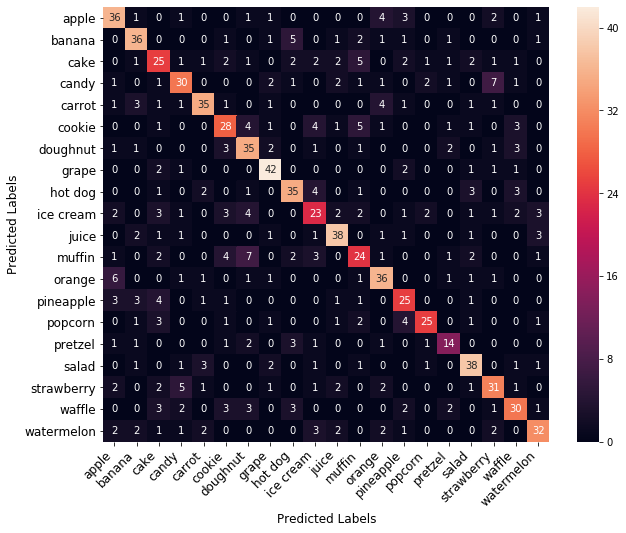

In [16]:
#now passing the parameters for confusion matrix
conf = compute_confusion_matrix(metrics, labels)
plot_confusion_matrix(conf, labels, figsize=(10,8))